In [1]:
from astropy.io import fits
import gaussfitter2
from matplotlib import pyplot
import scipy.optimize as opt
import numpy as np
import pylab as plt
%matplotlib inline

In [2]:
psf_file = "/scratch/datasets/astro_deconv_2019/99-wsclean-psf.fits"

In [3]:
data = fits.open(psf_file)[0].data.squeeze()

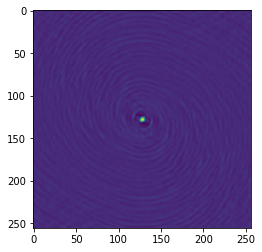

In [20]:
_ = pyplot.imshow(data)

In [21]:
def twoD_Gaussian(pos, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    x, y = pos
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

In [24]:
# Create x and y indices
x = np.linspace(0, 255, 256)
y = np.linspace(0, 255, 256)
x, y = np.meshgrid(x, y)
initial_guess = (1, 128, 128, 20, 20, 0, 0 )
popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), data.flatten(), p0=initial_guess)
data_fitted = twoD_Gaussian((x, y), *popt)


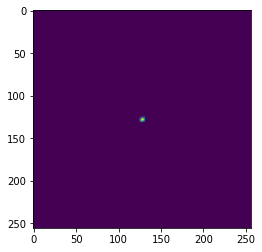

In [25]:
_ = plt.imshow(data_fitted.reshape(256, 256))